In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_path = '/kaggle/input/zara-fashion-sales-dataset-and-report/Zara_Sales_Analysis.csv'
fashion = pd.read_csv(file_path, delimiter=';', encoding='utf-8')
print(fashion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

In [2]:
fashion = fashion.drop_duplicates()
print(fashion.isnull().sum)

<bound method DataFrame.sum of      Product ID  Product Position  Promotion  Product Category  Seasonal  \
0         False             False      False             False     False   
1         False             False      False             False     False   
2         False             False      False             False     False   
3         False             False      False             False     False   
4         False             False      False             False     False   
..          ...               ...        ...               ...       ...   
247       False             False      False             False     False   
248       False             False      False             False     False   
249       False             False      False             False     False   
250       False             False      False             False     False   
251       False             False      False             False     False   

     Sales Volume  brand    url    sku   name  descripti

In [3]:
# total revenue and best-selling products

fashion['revenue_per'] = fashion['price'] * fashion['Sales Volume']
total_revenue = fashion['revenue_per'].sum()
total_m = total_revenue / 1000000

print(f"Total Revenue: $ {total_m:.2f}M\n")

top_revenue = (
    fashion.groupby('name', as_index=False)['revenue_per']
    .sum()
    .sort_values(by='revenue_per', ascending=False)
    .head(10)
)

top_revenue['Revenue ($ M)'] = (top_revenue['revenue_per'] / 1000000).round(2)
top_revenue = top_revenue.rename(columns = {'name': 'Product Name'})

print("Top Products by Revenue:\n")
print(top_revenue[['Product Name', 'Revenue ($ M)']].to_string(index = False))

Total Revenue: $ 38.99M

Top Products by Revenue:

                        Product Name  Revenue ($ M)
   CONTRASTING PATCHES BOMBER JACKET           0.89
           SUIT JACKET IN 100% LINEN           0.82
          FAUX LEATHER BOMBER JACKET           0.80
                     PLAID OVERSHIRT           0.70
                   RIB COLLAR JACKET           0.69
                SLIM FIT SUIT JACKET           0.68
                    POCKET OVERSHIRT           0.67
VINTAGE EFFECT LEATHER BOMBER JACKET           0.65
                        SUEDE JACKET           0.65
              BOUCLÉ TEXTURED JACKET           0.61


In [4]:
# sales by product category
revenue_cat = (
    fashion.groupby('terms', as_index = False)
    .agg({
        'revenue_per': 'sum',
        'Sales Volume': 'sum'
    })
    .sort_values(by = 'revenue_per', ascending = False)
)

revenue_cat['Revenue ($ M)'] = (revenue_cat['revenue_per'] / 1000000).round(2) 
revenue_cat = revenue_cat.rename(columns = {'terms': 'Category'})

print("Sales by Product Category:\n")
print(revenue_cat[['Category', 'Sales Volume', 'Revenue ($ M)']].to_string(index = False))

Sales by Product Category:

Category  Sales Volume  Revenue ($ M)
 jackets        259468          26.58
sweaters         75242           4.09
   shoes         57906           3.75
t-shirts         53637           3.70
   jeans         13320           0.86


In [5]:
# sales by product position

revenue_position = (
    fashion.groupby('Product Position', as_index = False)
    .agg({
        'revenue_per':'sum',
        'Sales Volume':'sum'
    })
    .sort_values(by = 'revenue_per', ascending = False)
)

revenue_position['Revenue ($ M)'] = (revenue_position['revenue_per'] / 1000000).round(2)

print("Sales by Product Position:\n")
print(revenue_position[['Product Position', 'Sales Volume', 'Revenue ($ M)']].to_string(index=False))

Sales by Product Position:

Product Position  Sales Volume  Revenue ($ M)
           Aisle        177396          15.48
         End-cap        152930          12.55
  Front of Store        129247          10.96


In [6]:
# sales by promotion

revenue_promo = (
    fashion.groupby('Promotion', as_index = False)
    .agg({
        'revenue_per': 'sum',
        'Sales Volume': 'sum'
    })
    .sort_values(by = 'revenue_per', ascending = False)
)

revenue_promo['Revenue ($ M)'] = (revenue_promo['revenue_per'] / 1000000).round(2)

print("Sales by Promotion:\n")
print(revenue_promo[['Promotion', 'Sales Volume', 'Revenue ($ M)']].to_string(index = False))

Sales by Promotion:

Promotion  Sales Volume  Revenue ($ M)
      Yes        219261          19.99
       No        240312          18.99


In [7]:
# sales by seasonal 

revenue_season = (
    fashion.groupby('Seasonal', as_index = False)
   .agg({
        'revenue_per': 'sum',
        'Sales Volume': 'sum'
    })
    .sort_values(by = 'revenue_per', ascending = False)
)

revenue_season['Revenue ($ M)'] = (revenue_season['revenue_per'] / 1000000).round(2)

print("Sales by Seasonal:\n")
print(revenue_season[['Seasonal', 'Sales Volume', 'Revenue ($ M)']].to_string(index = False))

Sales by Seasonal:

Seasonal  Sales Volume  Revenue ($ M)
     Yes        233181          19.83
      No        226392          19.16


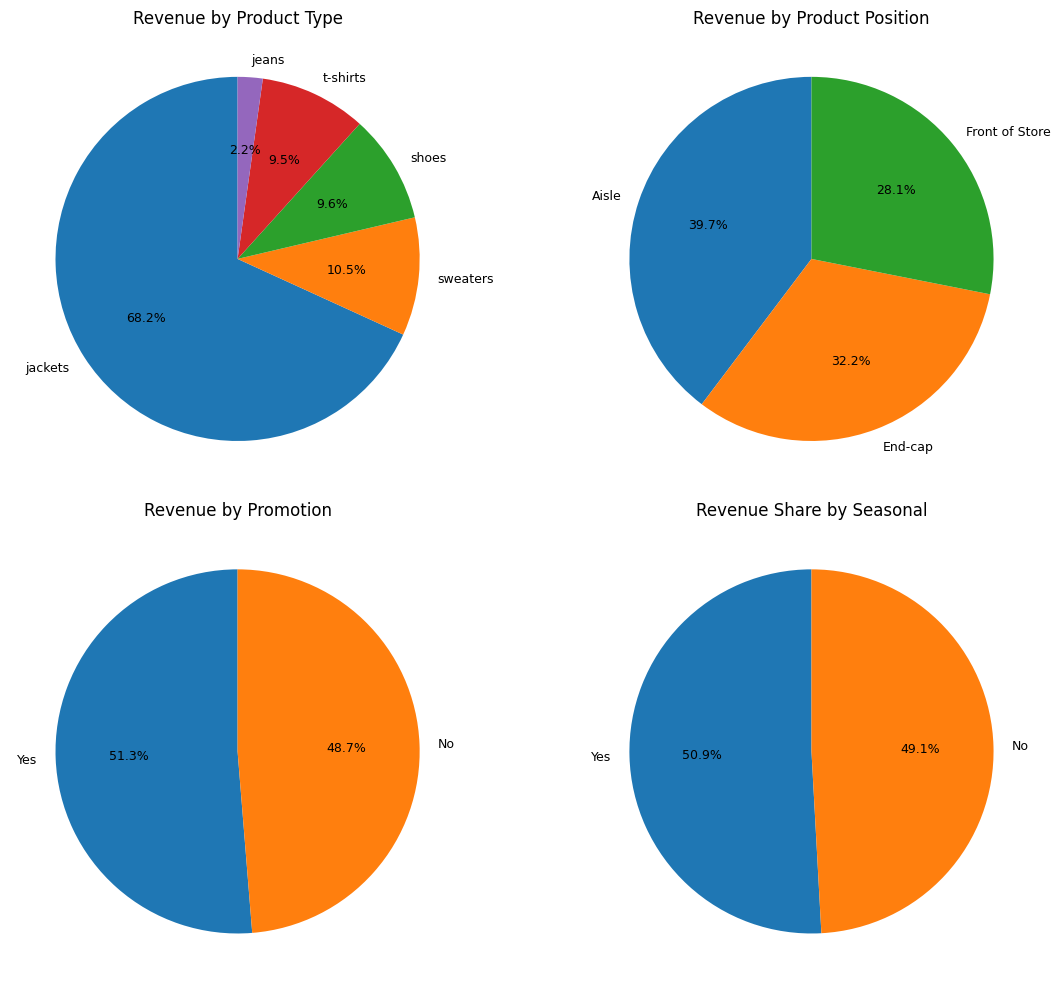

In [8]:
# revenue share 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() 

axes[0].pie(
    revenue_cat['revenue_per'],
    labels = revenue_cat['Category'],
    autopct = '%1.1f%%', 
    startangle = 90,
    textprops = {'fontsize': 9}
)
axes[0].set_title('Revenue by Product Type', fontsize=12)

axes[1].pie(
    revenue_position['revenue_per'],
    labels = revenue_position['Product Position'],
    autopct = '%1.1f%%', 
    startangle = 90,
    textprops = {'fontsize': 9}
)
axes[1].set_title('Revenue by Product Position', fontsize=12)

axes[2].pie(
    revenue_promo['revenue_per'],
    labels = revenue_promo['Promotion'],
    autopct = '%1.1f%%', 
    startangle = 90,
    textprops = {'fontsize': 9}
)
axes[2].set_title('Revenue by Promotion', fontsize=12)

axes[3].pie(
    revenue_season['revenue_per'],
    labels = revenue_season['Seasonal'],
    autopct = '%1.1f%%', 
    startangle = 90,
    textprops = {'fontsize': 9}
)
axes[3].set_title('Revenue Share by Seasonal', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# how to sell more products? 

import statsmodels.api as sm
from statsmodels.formula.api import ols

fashion = fashion.rename(columns = {'Product Position': 'Product_Position',
                                   'Sales Volume': 'Sales_Volume'})

model = ols('Sales_Volume ~ C(Promotion) * C(Seasonal) * C(Product_Position)', data=fashion).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                                    sum_sq     df         F  \
C(Promotion)                                  2.258653e+02    1.0  0.000455   
C(Seasonal)                                   6.767004e+03    1.0  0.013631   
C(Product_Position)                           3.588151e+05    2.0  0.361375   
C(Promotion):C(Seasonal)                      7.737483e+04    1.0  0.155854   
C(Promotion):C(Product_Position)              9.737835e+05    2.0  0.980731   
C(Seasonal):C(Product_Position)               6.738438e+05    2.0  0.678652   
C(Promotion):C(Seasonal):C(Product_Position)  9.472047e+05    2.0  0.953963   
Residual                                      1.191499e+08  240.0       NaN   

                                                PR(>F)  
C(Promotion)                                  0.983000  
C(Seasonal)                                   0.907156  
C(Product_Position)                           0.697096  
C(Promotion):C(Seasonal)                      0.693354  
C(P

None of the three factors has a statistically significant effect on the sales volume (i.e. number of items sold). We can still observe the pattern from the interaction plots to identify the way of maximizing product sale. 

<Figure size 640x480 with 0 Axes>

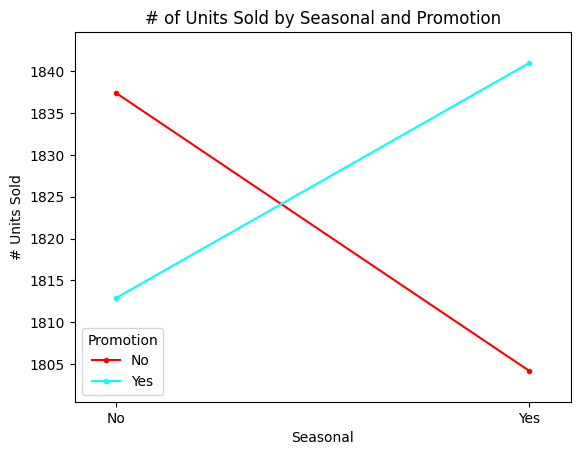

In [10]:
from statsmodels.graphics.factorplots import interaction_plot

fashion['Seasonal'] = fashion['Seasonal'].astype(str)
fashion['Promotion'] = fashion['Promotion'].astype(str)
fashion['Product_Position'] = fashion['Product_Position'].astype(str)

# 1. seasonal and promotion
fig = plt.figure()
interaction_plot(
    x = fashion['Seasonal'],       # X-axis factor
    trace = fashion['Promotion'],  # Lines for this factor
    response = fashion['Sales_Volume'], # Dependent variable
)
plt.title('# of Units Sold by Seasonal and Promotion')
plt.ylabel('# Units Sold')
plt.xlabel('Seasonal')
plt.show()

Maximum units are sold when the item is seasonal and on promotion.

<Figure size 640x480 with 0 Axes>

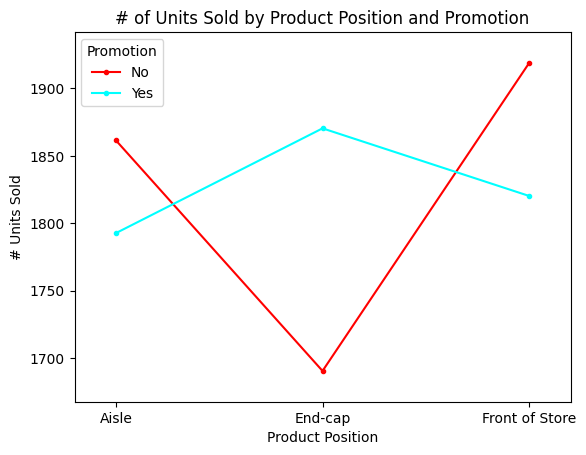

In [11]:
# 2. product position and promotion
plt.figure()
interaction_plot(
    x = fashion['Product_Position'],
    trace = fashion['Promotion'],
    response = fashion['Sales_Volume'],
)
plt.title('# of Units Sold by Product Position and Promotion')
plt.ylabel('# Units Sold')
plt.xlabel('Product Position')
plt.show()

Maximum units are sold when the item is located at the front of the store and not on promotion.  

<Figure size 640x480 with 0 Axes>

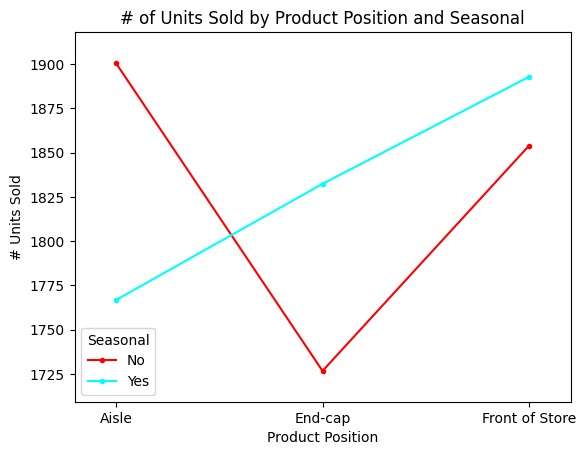

In [12]:
# 3. product position and seasonal
plt.figure()
interaction_plot(
    x = fashion['Product_Position'],
    trace = fashion['Seasonal'],
    response = fashion['Sales_Volume'],
)
plt.title('# of Units Sold by Product Position and Seasonal')
plt.ylabel('# Units Sold')
plt.xlabel('Product Position')
plt.show()

Maximum units are sold when the item is located at the front of the store and seasonal.

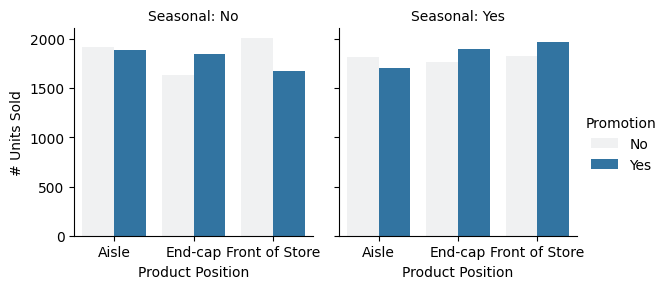

In [13]:
fashion['Promotion'] = fashion['Promotion'].astype('category')
fashion['Seasonal'] = fashion['Seasonal'].astype('category')
fashion['Product_Position'] = fashion['Product_Position'].astype('category')

three = sns.FacetGrid(fashion, col = 'Seasonal')
three.map_dataframe(
    sns.barplot, 
    x = 'Product_Position',  
    y = 'Sales_Volume',       
    hue = 'Promotion',
    ci = None
)
three.add_legend(title = 'Promotion')
three.set_axis_labels('Product Position', '# Units Sold')
three.set_titles(col_template = 'Seasonal: {col_name}')
plt.show()

When the item is not seasonal, maximum units are sold when it is located at the front of the store and not on promotion. When the item is seasonal, maximum units are sold when it is located at the front of the store and on promotion. 

For a non-seasonal item, baseline consumer demand is relatively stable, evenly spread throughout the year, and less influenced by temporal factors (e.g., basic t-shirts, hoodies, etc.). Increasing its exposure, visibility, and accessibility by placing it at the front of the store will lead to increased impulse purchases. Also, as the consumers are not under pressure to purchase the item, promotional activity will not substantially enhance its demand. In some cases, promotions can be perceived as an indicator of lower product quality, which can even harm its sales. 

On the other hand, a seasonal item creates urgency and exclusivity. More motivated and enthusiastic customers are more likely to be predisposed towards purchase, in which high-visibility placement and promotion function as effective cues that increase product demand. Placing the item at the front of the store increases its salience, and promotions reinforce perceived value during a limited purchase window, thereby accelerating purchase decisions. 